In [110]:
"""
Evan Hodge 800986621 HW_2 ECGR_4105

P 1 

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. 
Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper 
scaling and standardization before your training. Report your results, including accuracy, 
precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

"""
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
DB = pd.read_csv('diabetes.csv')
DB.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

 Accuracy: 0.8181818181818182
Precision: 0.7714285714285715
   Recall: 0.574468085106383


Text(0.5, 274.44, 'Predicted Label')

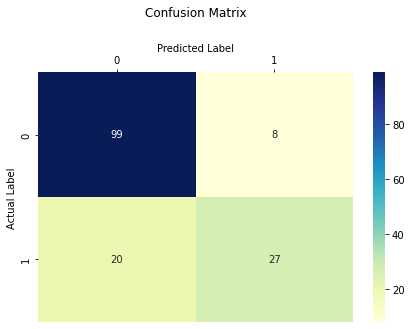

In [111]:
# we'll use Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age as variables and Outcome for Y
X = DB.iloc[:,0:8].values
Y = DB.iloc[:,8].values

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = sc_X.fit_transform(X)

from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=0)
#print(df_train.shape)
vars = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


Y_pred = classifier.predict(X_test)
Y_pred[0:9]

report = classification_report(Y_test, Y_pred)
print(report)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

from sklearn import metrics
print(" Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("   Recall:", metrics.recall_score(Y_test, Y_pred))

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.2)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [112]:
"""

P 2 

Repeat problem 1, and this time use K-fold cross-validation for your training and validation. 
Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy 
against problem 1.

"""
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
DB = pd.read_csv('diabetes.csv')
DB.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [113]:
# we'll use Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age as variables and Outcome for Y
X = DB.iloc[:,0:8].values
Y = DB.iloc[:,8].values

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
sc_X = StandardScaler()              
#sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = sc_X.fit_transform(X)

 Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
   Recall: 0.6170212765957447


Text(0.5, 274.44, 'Predicted Label')

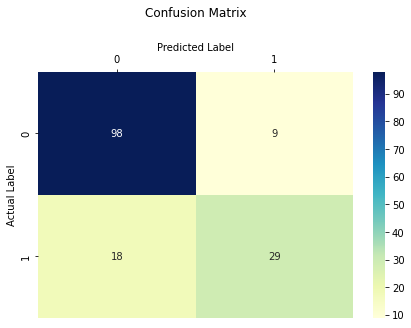

In [114]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=0)
#print(df_train.shape)
vars = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

from sklearn import metrics
print(" Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("   Recall:", metrics.recall_score(Y_test, Y_pred))

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.2)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [115]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print(" 5-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("10-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.82467532 0.77922078 0.75324675 0.74509804 0.77777778]
 5-fold Accuracy: 77.600% (2.777%)
[0.87012987 0.77922078 0.74025974 0.83116883 0.74025974 0.74025974
 0.79220779 0.71428571 0.72368421 0.82894737]
10-fold Accuracy: 77.604% (5.036%)


              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

 Accuracy: 0.9649122807017544
Precision: 0.9436619718309859
   Recall: 1.0


Text(0.5, 274.44, 'Predicted Label')

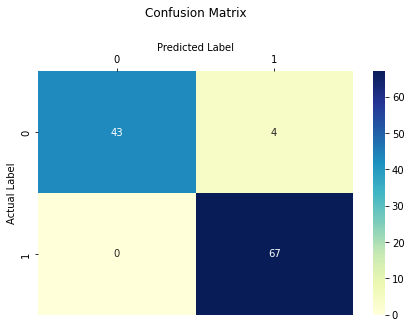

In [116]:
"""

P 3-a
Use the cancer dataset to build a logistic regression model to classify the type of cancer 
(Malignant vs. benign). First, create a logistic regression that takes all 30 input 
features for classification. Please use 80% and 20% split between training and evaluation 
(test). Make sure to perform proper scaling and standardization before your training. 
Report your results, including accuracy, precision, and recall. At the end, plot the 
confusion matrix representing your binary classifier. 

"""
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
rawdata = load_breast_cancer()
#print(rawdata)
#DB = rawdata.data
#DB = pd.DataFrame(DB)
#DB = pd.read_csv('diabetes.csv')
#print(DB)

# we'll use Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age as variables and Outcome for Y
X = rawdata['data']
Y = rawdata['target']

#print(X)
#print(Y)

from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#sc_X = StandardScaler()              
sc_X = MinMaxScaler()      # Better TruePositive results were obtained using min/max scaling         

X = sc_X.fit_transform(X)

from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=0)
#print(X_train)
#vars = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)
#X_train, X_test
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


Y_pred = classifier.predict(X_test)
Y_pred[0:29]
report = classification_report(Y_test, Y_pred)
print(report)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

from sklearn import metrics
print(" Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("   Recall:", metrics.recall_score(Y_test, Y_pred))

class_names = ['0:Benign','1:Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.2)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [117]:
"""

P 3-b
How about adding weight penalty here, considering the number of parameters. Add the weight 
penalty and repeat the training and report the results.

"""
C = [10,1,.1,.001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print(' ')

C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.956140350877193
 
C: 1
Training accuracy: 0.9714285714285714
Test accuracy: 0.9649122807017544
 
C: 0.1
Training accuracy: 0.9318681318681319
Test accuracy: 0.9122807017543859
 
C: 0.001
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597
 


In [118]:
"""

P 4-a
Repeat problem 3, and this time use K-fold cross-validation for your training and 
validation. Perform the training two times for K=5 and K=10. Analyze and compare your 
average accuracy against problem 3. 

"""
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("5-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

n_splits=10

kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("10-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.95614035 0.94736842 0.95614035 0.93859649 1.        ]
5-fold Accuracy: 95.965% (2.120%)
[0.98245614 0.92982456 0.94736842 0.94736842 0.98245614 0.92982456
 0.92982456 0.94736842 1.         1.        ]
10-fold Accuracy: 95.965% (2.724%)


In [119]:
"""

P 4-b
Repeat problem 3, and this time use K-fold cross-validation for your training and 
validation. Perform the training two times for K=5 and K=10. Analyze and compare your 
average accuracy against problem 3. 

"""
C = [10,1.0,0.1,.001]

for c in C:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    
    print('_____________________________________')
    print(' C=', c, "             pct    (Deviation)")
    print("                           |")
    print(' Training accuracy: %.3f%%'% clf.score(X_train, Y_train))
    print('     Test accuracy: %.3f%%'% clf.score(X_test, Y_test))
    
    model = LogisticRegression(penalty='l1', C=c,solver='liblinear')
    results = cross_val_score(model, X, Y, cv=kfold)
    
    #print(results)
    print("\n   5-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    model = LogisticRegression(penalty='l1', C=c,solver='liblinear')
    results = cross_val_score(model, X, Y, cv=kfold)
    
    #print(results)
    print("  10-fold Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    print(' ')

_____________________________________
 C= 10              pct    (Deviation)
                           |
 Training accuracy: 0.989%
     Test accuracy: 0.956%

   5-fold Accuracy: 96.667% (2.105%)
  10-fold Accuracy: 97.193% (2.626%)
 
_____________________________________
 C= 1.0              pct    (Deviation)
                           |
 Training accuracy: 0.971%
     Test accuracy: 0.965%

   5-fold Accuracy: 96.665% (1.401%)
  10-fold Accuracy: 96.313% (2.139%)
 
_____________________________________
 C= 0.1              pct    (Deviation)
                           |
 Training accuracy: 0.932%
     Test accuracy: 0.912%

   5-fold Accuracy: 92.093% (0.771%)
  10-fold Accuracy: 92.619% (1.888%)
 
_____________________________________
 C= 0.001              pct    (Deviation)
                           |
 Training accuracy: 0.363%
     Test accuracy: 0.412%

   5-fold Accuracy: 37.260% (3.547%)
  10-fold Accuracy: 37.271% (5.239%)
 
